### Q - 9 Write a program to read the data from the following link, perform data analysis and answer the following questions

Link :  https://data.wa.gov/api/views/f6w7-q2d2/rows.csv?accessType=DOWNLOAD

In [1]:
#Data Downloaded & Moved to the folder

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("Electric_Vehicle_Population_Data.csv")

In [4]:
df

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJXCAE26J,Yakima,Yakima,WA,98908.0,2018,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,14.0,141151601,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10
1,JHMZC5F37M,Kitsap,Poulsbo,WA,98370.0,2021,HONDA,CLARITY,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,47,0,23.0,171566447,POINT (-122.64681 47.73689),PUGET SOUND ENERGY INC,5.303509e+10
2,5YJ3E1EB0K,King,Seattle,WA,98199.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,36.0,9426525,POINT (-122.40092 47.65908),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,1N4AZ0CP5D,King,Seattle,WA,98119.0,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75,0,36.0,211807760,POINT (-122.3684 47.64586),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
4,5YJSA1E21H,Thurston,Lacey,WA,98516.0,2017,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,22.0,185810306,POINT (-122.75379 47.06316),PUGET SOUND ENERGY INC,5.306701e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130438,7SAYGDEE6P,Pierce,Gig Harbor,WA,98335.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,26.0,231134102,POINT (-122.58354539999999 47.32344880000005),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.305307e+10
130439,1N4BZ1CV7N,Pierce,Tacoma,WA,98408.0,2022,NISSAN,LEAF,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,29.0,185810943,POINT (-122.43810499999995 47.203220000000044),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.305306e+10
130440,5YJYGDEE8M,King,Seattle,WA,98109.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,36.0,176542418,POINT (-122.35022 47.63824),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
130441,5YJXCBE22L,Island,Camano Island,WA,98282.0,2020,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,293,0,10.0,102834938,POINT (-122.40049 48.23986),BONNEVILLE POWER ADMINISTRATION||PUD 1 OF SNOH...,5.302997e+10


### 1. Get all the cars and their types that do not qualify for clean alternative fuel vehicle

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130443 entries, 0 to 130442
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         130443 non-null  object 
 1   County                                             130440 non-null  object 
 2   City                                               130440 non-null  object 
 3   State                                              130443 non-null  object 
 4   Postal Code                                        130440 non-null  float64
 5   Model Year                                         130443 non-null  int64  
 6   Make                                               130443 non-null  object 
 7   Model                                              130221 non-null  object 
 8   Electric Vehicle Type                              130443 non-null  object

In [9]:
#creating filter rows for non-eligiable rows

non_cafv_cars = df[df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'] != 'Clean Alternative Fuel Vehicle Eligible'] #it is consider data is unknown is also not -eligiable
car_types = non_cafv_cars[['Make', 'Model', 'Electric Vehicle Type']]
#Listing the list
car_types

,Make,Model,Electric Vehicle Type
6,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV)
7,AUDI,Q5 E,Plug-in Hybrid Electric Vehicle (PHEV)
8,FORD,C-MAX,Plug-in Hybrid Electric Vehicle (PHEV)
11,TESLA,MODEL Y,Battery Electric Vehicle (BEV)
14,FORD,C-MAX,Plug-in Hybrid Electric Vehicle (PHEV)
...,...,...,...
130437,BMW,530E,Plug-in Hybrid Electric Vehicle (PHEV)
130438,TESLA,MODEL Y,Battery Electric Vehicle (BEV)
130439,NISSAN,LEAF,Battery Electric Vehicle (BEV)
130440,TESLA,MODEL Y,Battery Electric Vehicle (BEV)


### 2. Get all TESLA cars with the model year, and model type made in Bothell City.

In [10]:
#filter data of make & city
cars = df[(df['Make'] == 'TESLA') & (df['City'] == 'Bothell')]

In [11]:
car_info = cars[['Model Year', 'Model']]
print(car_info)

        Model Year    Model
39            2020  MODEL 3
217           2022  MODEL 3
218           2022  MODEL Y
222           2018  MODEL 3
292           2017  MODEL X
...            ...      ...
129778        2019  MODEL 3
129954        2021  MODEL 3
129976        2014  MODEL S
130295        2022  MODEL 3
130392        2018  MODEL 3

[2407 rows x 2 columns]


### 3. Get all the cars that have an electric range of more than 100, and were made after |2015

In [13]:
#filtering same as above.

cars = df[(df["Electric Range"] > 100) & (df["Model Year"] > 2015)]
car_info = cars[["Make", "Model"]]
print(car_info)

          Make    Model
0        TESLA  MODEL X
2        TESLA  MODEL 3
4        TESLA  MODEL S
12       TESLA  MODEL 3
13       TESLA  MODEL 3
...        ...      ...
130417   TESLA  MODEL Y
130428  NISSAN     LEAF
130432   TESLA  MODEL Y
130436   TESLA  MODEL 3
130441   TESLA  MODEL X

[34066 rows x 2 columns]


### 4. Draw plots to show the distribution between city and electric vehicle type 

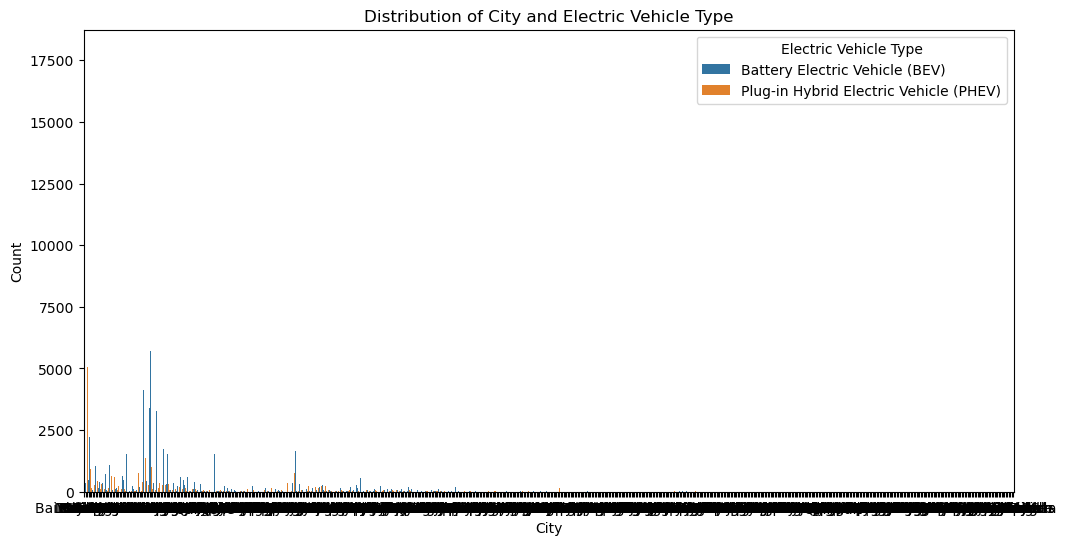

In [15]:
#Best graph that can be use is counter plot

import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='City', hue='Electric Vehicle Type')
plt.xlabel('City')
plt.ylabel('Count')
plt.title('Distribution of City and Electric Vehicle Type')
plt.legend(title='Electric Vehicle Type')
plt.show()
